# Compare INMAP and BenMAP mortality output

Author : Yunha Lee 

Date: Mar 26, 2025

INMAP mortality is based on Krewski et al. (2009).
 - using a Cox proportional hazards model and assuming a 6% increase in overall mortality for every 10 μg/m³ increase in PM2.5 concentration 
 - for the adults aged 30 and older  (double check this)

BenMAP mortality is based on Di et al. (2017)
 - causal inference methods (e.g., doubly robust approaches, machine learning techniques) and a log-linear exposure-response function.
 - aged 65 and older
 - The estimated risk is higher than Krewski et al. (2009)
 - adverse effects even at low PM₂.₅ concentrations


**Important note:** The comparisons will be done for total health impact, not by regions because different grid resolutions.  INMAP output is varying grids, while BenMAP output is at county-level (can be coarser than INMAP).

Next step : I plan to include BenMAP with Pope et al (2019), which includes younger population
  
 
 

## Step 1: Read INMAP mortality sums

In [65]:
import pandas as pd
import os

main_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/model_analysis/'
run_list = ['CO_CCS', 'CO_CCS_wo_NH3_VOC', 'CO_Suncor_CCS_wo_NH3_VOC','CO_Cherokee_CCS_wo_NH3_VOC', 'NEI_no_Landfill_2001411']
target_file = 'mortality_sums.csv'

combined_df = None

for run in run_list:
    output_path = os.path.join(main_dir, run)
    df = pd.read_csv(output_path + '/'+target_file, header=None)

    df.columns = ["Race", "INMAP: "+run]

    # Merge on 'Species' column
    if combined_df is None:
        combined_df = df  # First dataframe, set as base
    else:
        combined_df = pd.merge(combined_df, df, on="Race", how="outer")

combined_df.dropna(inplace=True)
print(combined_df)

         Race  INMAP: CO_CCS  INMAP: CO_CCS_wo_NH3_VOC  \
0      AsianD       0.475847                 -0.165865   
1      BlackD       1.439416                 -0.551137   
2     LatinoD       3.951309                 -1.679064   
3     NativeD       0.081616                 -0.035150   
4   TotalPopD      15.015228                 -5.951653   
5  WhitNoLatD       8.665428                 -3.366428   

   INMAP: CO_Suncor_CCS_wo_NH3_VOC  INMAP: CO_Cherokee_CCS_wo_NH3_VOC  \
0                        -0.050331                          -0.083549   
1                        -0.203833                          -0.272251   
2                        -0.532235                          -0.916534   
3                        -0.011291                          -0.015706   
4                        -1.858981                          -2.864803   
5                        -1.011101                          -1.501783   

   INMAP: NEI_no_Landfill_2001411  
0                       -0.295903  
1        

In [66]:
rename_inmap ={'TotalPopD': 'ALL', 'AsianD': 'ASIAN','BlackD':'BLACK', 'NativeD':"NATAMER", 'WhitNoLatD':'WHITE'}

# change INMAP race value to match BenMAP
combined_df['Race'] = combined_df['Race'].replace(rename_inmap)

# Change the sign of value to match BenMAP
for name in combined_df.columns:
    if name != 'Race': 
        combined_df[name] = combined_df[name] * -1 # convert negative value to positive 

combined_df

,Race,INMAP: CO_CCS,INMAP: CO_CCS_wo_NH3_VOC,INMAP: CO_Suncor_CCS_wo_NH3_VOC,INMAP: CO_Cherokee_CCS_wo_NH3_VOC,INMAP: NEI_no_Landfill_2001411
0,ASIAN,-0.475847,0.165865,0.050331,0.083549,0.295903
1,BLACK,-1.439416,0.551137,0.203833,0.272251,0.661691
2,LatinoD,-3.951309,1.679064,0.532235,0.916534,1.070564
3,NATAMER,-0.081616,0.035150,0.011291,0.015706,0.022588
4,ALL,-15.015228,5.951653,1.858981,2.864803,5.742322
5,WHITE,-8.665428,3.366428,1.011101,1.501783,3.453750


## Step 2: Read BenMAP mortality sums

In [67]:
benmap_file = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/BenMAP/county/incidence_results/Health_Benefit_all_CO_runs.csv'

df_benmap = pd.read_csv(benmap_file)

df_benmap['Endpoint'] = df_benmap['Endpoint'].str.strip()

print(df_benmap['Endpoint'])

df_benmap = df_benmap[df_benmap['Endpoint'] == 'Mortality  All Cause']

# delete the first column and Endpoint, which is just row number
df_benmap = df_benmap.drop(df_benmap.columns[0], axis=1)
df_benmap = df_benmap.drop(df_benmap.columns[0], axis=1)

# rename columns to contain benmap
for name in df_benmap.columns:
    if name != 'Endpoint' and name != 'Race': 
        df_benmap.rename(columns={name: "BenMAP: " + name}, inplace=True)

df_benmap

print(df_benmap)


0                   Asthma Exacerbation  Cough
1                   Asthma Exacerbation  Cough
2     Asthma Exacerbation  Shortness of Breath
3     Asthma Exacerbation  Shortness of Breath
4                  Asthma Exacerbation  Wheeze
5                  Asthma Exacerbation  Wheeze
6                         Mortality  All Cause
7                         Mortality  All Cause
8                         Mortality  All Cause
9                         Mortality  All Cause
10                        Mortality  All Cause
11                              Work Loss Days
Name: Endpoint, dtype: object
       Race  BenMAP: CO_CCS  BenMAP: CO_CCS_wo_NH3_VOC  \
6       ALL        -6.99000                    2.70700   
7     ASIAN        -0.18880                    0.07088   
8     BLACK        -1.70400                    0.65640   
9   NATAMER        -0.05404                    0.02257   
10    WHITE        -5.85700                    2.27300   

    BenMAP: CO_Cherokee_CCS_wo_NH3_VOC  BenMAP: CO_Suncor

         INMAP: CO_CCS  INMAP: CO_CCS_wo_NH3_VOC  \
Race                                               
ASIAN        -0.475847                  0.165865   
BLACK        -1.439416                  0.551137   
NATAMER      -0.081616                  0.035150   
ALL         -15.015228                  5.951653   
WHITE        -8.665428                  3.366428   

         INMAP: CO_Suncor_CCS_wo_NH3_VOC  INMAP: CO_Cherokee_CCS_wo_NH3_VOC  \
Race                                                                          
ASIAN                           0.050331                           0.083549   
BLACK                           0.203833                           0.272251   
NATAMER                         0.011291                           0.015706   
ALL                             1.858981                           2.864803   
WHITE                           1.011101                           1.501783   

         INMAP: NEI_no_Landfill_2001411  BenMAP: CO_CCS  \
Race                  

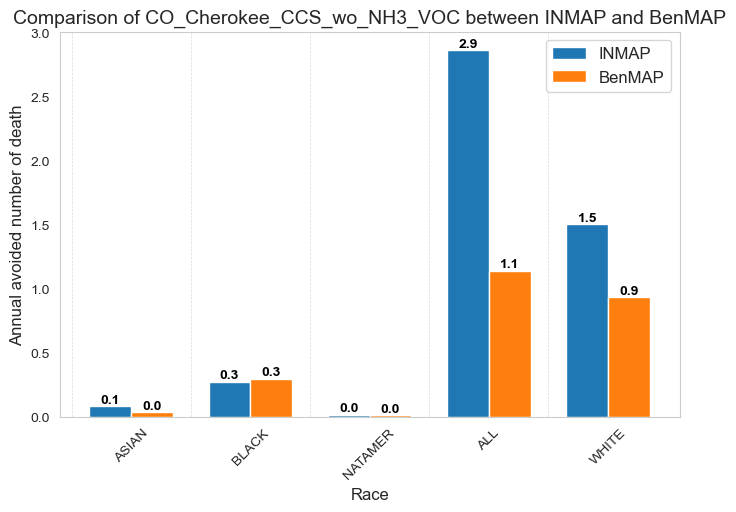

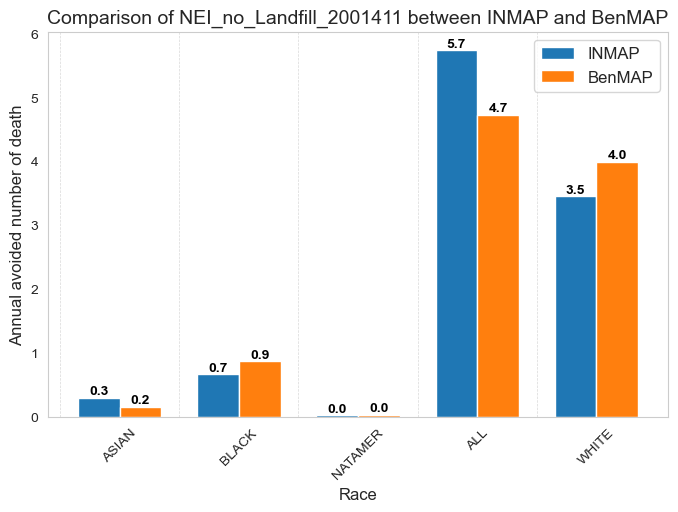

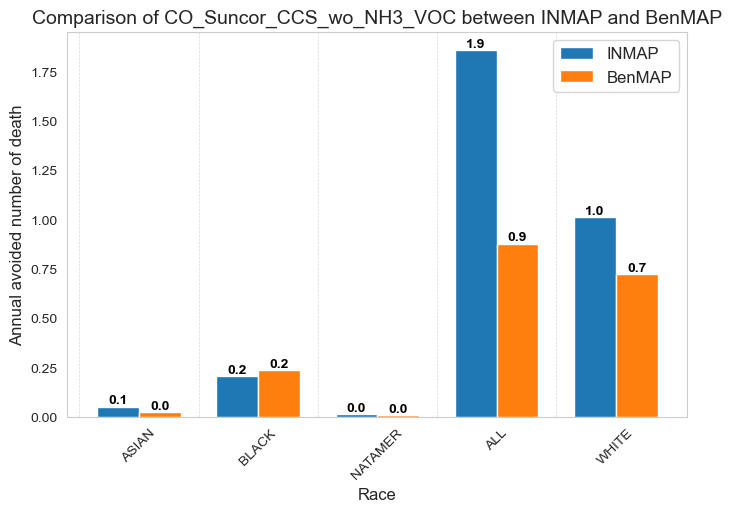

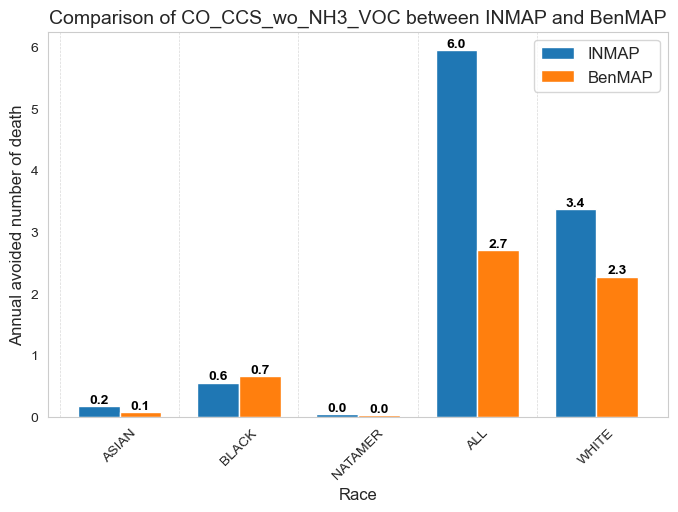

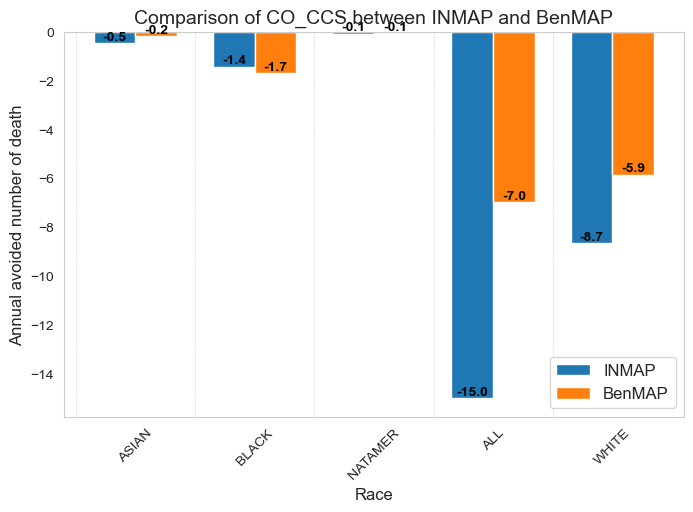

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# combine two dataframe
merged_df = combined_df.merge(df_benmap, on="Race", how="inner")

# Ensure "Race" is the index (Fix missing bars issue)
merged_df.set_index("Race", inplace=True)

print(merged_df)

# Set seaborn style
sns.set_style("whitegrid")

# Extract unique run names, excluding "Race"
run_names = set(col.split(": ")[1] for col in merged_df.columns if ": " in col)

# Plot comparison for each run
for run in run_names:
    inmap_col = f"INMAP: {run}"
    benmap_col = f"BenMAP: {run}"
    
    if inmap_col in merged_df.columns and benmap_col in merged_df.columns:
        # Create a new DataFrame for plotting
        plot_df = merged_df[[inmap_col, benmap_col]]

        # Plot
        ax = plot_df.plot(kind="bar", figsize=(8, 5), width=0.7, color=["#1f77b4", "#ff7f0e"])  # Blue & Orange for better contrast
        plt.title(f"Comparison of {run} between INMAP and BenMAP", fontsize=14)
        plt.xlabel("Race", fontsize=12)
        plt.ylabel("Annual avoided number of death", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(["INMAP", "BenMAP"], fontsize=12)
        #plt.grid(axis="y", linestyle="--", alpha=0.7)
        ax.grid(False)  # Completely removes the grid
        
        # Add subtle vertical gridlines between categories
        for i in range(len(ax.get_xticks())):
            ax.axvline(x=i - 0.5, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

        # Add value labels on top of bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}',  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

        plt.show()
